In [73]:
from __future__ import division
import numpy as np

In [19]:
#Universal Constants
c = 3e8
G = 6.67e-11
Msolar = 2e30

In [84]:
#Define all functions

def sma(M,f):
    #Total mass, orbital frequency
    return (G*M/(2*np.pi*f)**2)**(1/3)





def calc_chidot(omega,e,chi):
    
    dom_dbeta = (1+e*np.cos(chi))**2 / (1-e**2)**(3/2)
    return omega*dom_dbeta
    

def calc_chiddot(omega,e,chi,chidot):
    
    ddot = - 2*e*np.sin(chi)*(1+e*np.cos(chi))*chidot / (1-e**2)**(3/2)
    return omega**2 * ddot


def calc_edot(e,gamma):
    ans = 0
    #ans = 5*K*(1-np.cos(I)**2)*e*(1-e**2)*np.sin(2*gamma) / J
    return ans



def calc_gamma_dot(e,gamma):
    bit1 = 2*(1-e**2) - 5*(1-e**2 - np.cos(I)**2)*np.sin(gamma)**2
    bit2 = (1 - e**2 + 5*e**2 * np.sin(gamma))*np.cos(I)
    return 2*K*(bit1/J + bit2/J2)




def calc_eddot(e,gamma,edot):
    gammadot = calc_gamma_dot(e, gamma)
    return (1-3*e**2)*edot*np.sin(2*gamma) + 2*e*(1-e**2)*gammadot*np.cos(gamma)

def Ixx(mu,a,e,chi,gamma):
    
    chidot = calc_chidot(omega,e,chi)
    chiddot = calc_chiddot(omega, e,chi,chidot)
    edot = calc_edot(e,gamma)
    eddot = calc_eddot(e,gamma,edot)
    
    
    
    CChi = np.cos(chi)
    SChi = np.sin(chi)
    ec = e*CChi
    
    Final = 2*SChi*edot*chidot - CChi*eddot + e*(CChi*chidot**2 + SChi*chiddot)
    part1 = -8*CChi*(1+ec)*(1-e**2)*SChi*chidot*(edot*(CChi + 2*e + CChi*e**2) +e*(e**2-1)*SChi*chidot )
    part2 = (1+ec)**2 * (e**2-1)**2 * (2*np.cos(2*chi)*chidot**2 + np.sin(2*chi)*chiddot)
    part3 = (1/3 - CChi**2)*(16*e*(1+e*CChi)*(e**2-1)*edot*(-CChi*edot + e*SChi*chidot)+4*(1+ec)**2*((-1+3*e**2)*edot**2 + e*(-1+e**2)*eddot)+2*(-1+e)**2 * (3*(CChi*edot - e*SChi*chidot)**2 +(1+ec)*(Final)))
    
    
    
    AA = part1+part2+part3
    
    
    BB = (1+ec)**4
    
    Ixx = -(a**2*mu * AA/BB)
    return Ixx
    
    

In [85]:
#Define system constants of inner binary
m0 = 10*Msolar
m1 = 20*Msolar
M = m0+m1
mu = m0*m1/M
f = 1e-3 #orbital frequency
I = 45 * np.pi/180.0 #Inclination
gamma = I #?
e = 0.5
chi = 0.1 #?

#Define system constants of outer binary
m2 = 1*Msolar #mass of outer object
e2 = 0.6
f2 = 1e-6 #second orbital frequency



#Calculations re inner binary
a = sma(M,f)#semi major axis via K3
omega = np.sqrt(G*M/a**3)
J = m0*m1*np.sqrt(G*a/M) #angular momentum of inner binary


#Calculations re outer binary
a2 = sma(m2+M,f2)
J2 = m2*M*np.sqrt(G*a2/(m2+M)) #angular momentum of inner binary


#Misc calculations
K = (3*G*m0*m1*m2/M)*(a**2/(a2**3 * (1-e2**2)**(3/2)))
 

#Ok lets do some evaluations


nsteps = int(1e3)
plot = np.zeros(nsteps)

for i in range(nsteps):
    #Calculate Ixx
    out = Ixx(mu,a,e,chi,gamma)
    
    #Update e,chi,gamma - this is not really the proper implementation
    h = 10
    #Update gamma

    k1 = h * calc_gamma_dot(e,gamma)
    k2 = h * calc_gamma_dot(e,gamma+k1/2)
    k3 = h * calc_gamma_dot(e,gamma+k2/2)
    k4 = h * calc_gamma_dot(e,gamma+k3)
    
    gamma_new = gamma + (k1+2*k2 + 2*k3 + k4)/6

    #Update chi
    

    k1 = h * calc_chidot(omega,e,chi)
    k2 = h * calc_chidot(omega,e,chi+k1/2)
    k3 = h * calc_chidot(omega,e,chi+k2/2)
    k4 = h * calc_chidot(omega,e,chi+k3)
    
    chi_new = chi + (k1+2*k2 + 2*k3 + k4)/6
    
    #Update e
    

    k1 = h * calc_edot(e,gamma)
    k2 = h * calc_edot(e+k1/2,gamma)
    k3 = h * calc_edot(e+k2/2,gamma)
    k4 = h * calc_edot(e+k3,gamma)
    
    e_new = e + (k1+2*k2 + 2*k3 + k4)/6
    
    gamma = gamma_new
    chi = chi_new
    e = e_new
    
    plot[i] = out
    
    
    

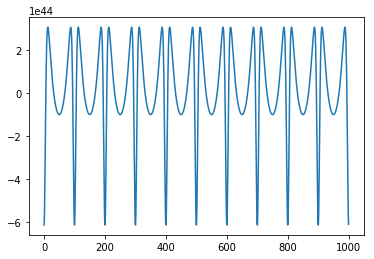

In [86]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

x = np.arange(nsteps)
y = plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y)